# Data Exploration

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## a)

In [18]:
df = pd.read_csv('../insurance_orig.csv')
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 1349
Columns: 7


## b)

In [19]:
df.describe().round(2)

,age,bmi,children,charges
count,1348.00,1347.00,1348.00,1347.00
mean,39.23,30.66,1.10,13254.72
std,14.06,6.09,1.22,12096.11
min,18.00,15.96,0.00,1121.87
25%,27.00,26.32,0.00,4742.31
50%,39.00,30.36,1.00,9377.90
75%,51.00,34.64,2.00,16582.14
max,64.00,53.13,7.00,63770.43


## c)

In [20]:
df_complete = df.dropna()
print('Rows without any NaN:', df_complete.shape[0])

Rows without any NaN: 1338


## d)

In [21]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['underweight', 'normal weight', 'overweight', 'obese']

df_complete['bmi_class'] = pd.cut(df_complete['bmi'], bins=bins, labels=labels, right=False)

counts = df_complete['bmi_class'].value_counts(dropna=False).sort_index()
print('BMI class counts:')
print(counts)


BMI class counts:
bmi_class
underweight       20
normal weight    225
overweight       386
obese            707
Name: count, dtype: int64


/var/folders/dx/zg72_dd90pqc_7h072826z180000gn/T/ipykernel_47950/1886011401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['bmi_class'] = pd.cut(df_complete['bmi'], bins=bins, labels=labels, right=False)


## e)

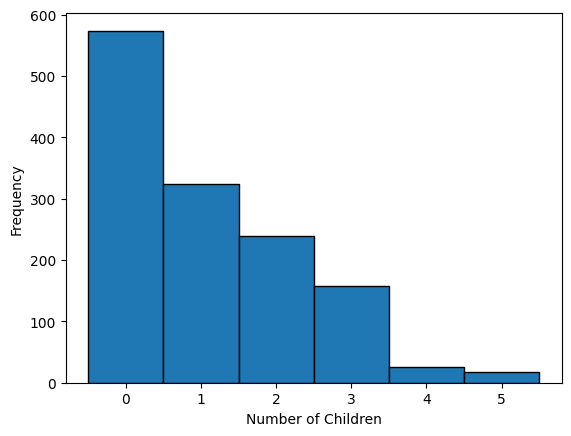

In [28]:
plt.hist(df_complete['children'], bins=range(0, int(df_complete['children'].max())+2), align='left', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

## f)

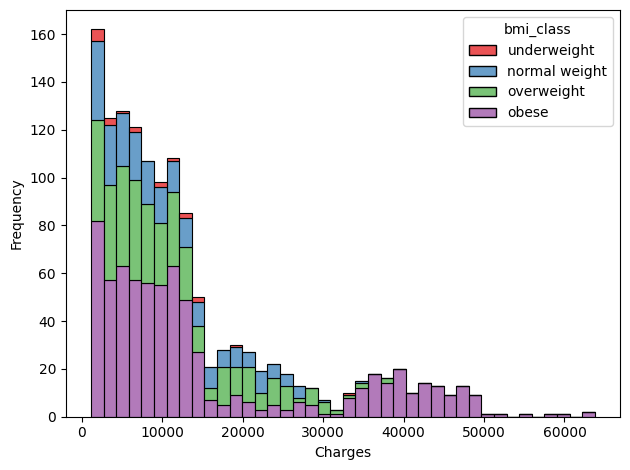

In [23]:
num_bins = 40

sns.histplot(
    data=df_complete,
    x='charges',
    hue='bmi_class',
    bins=num_bins,
    multiple='stack', 
    palette='Set1'
)

plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## h)

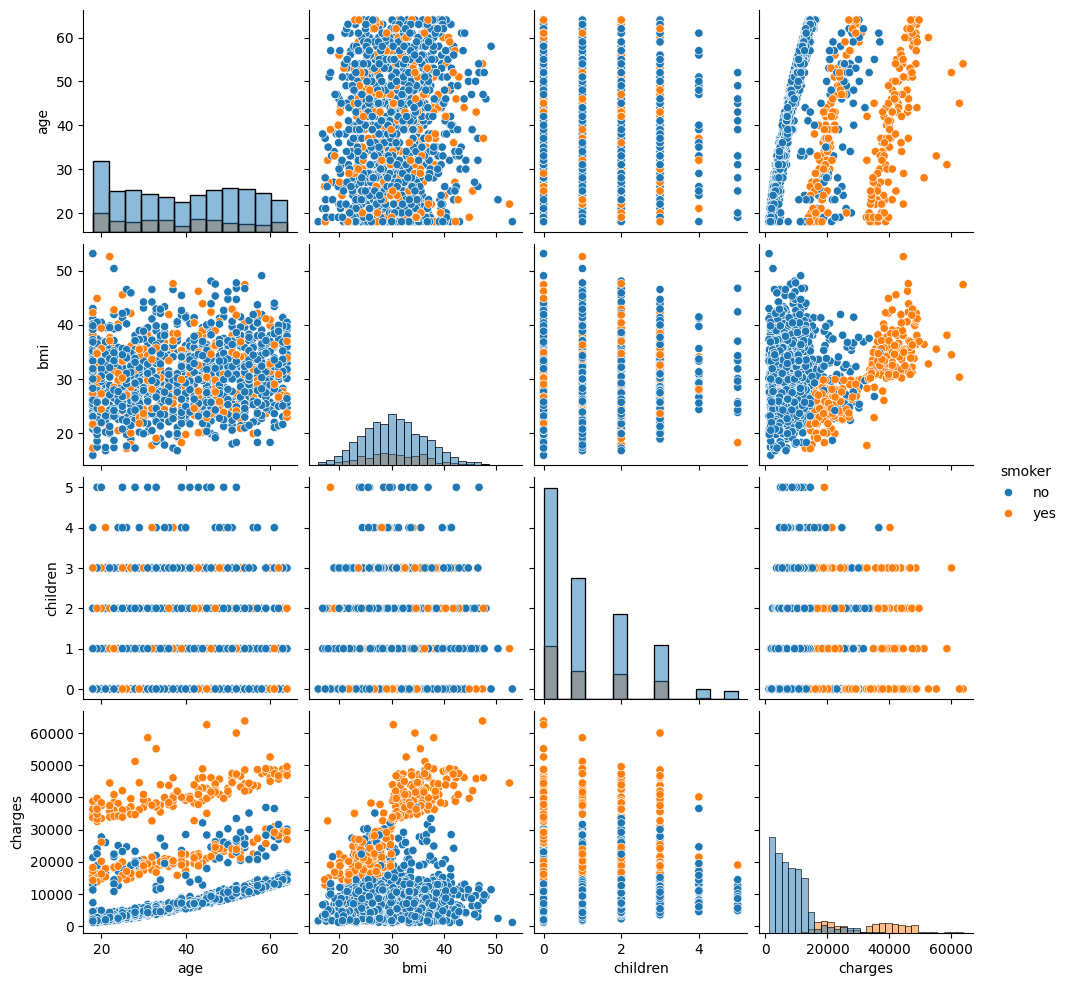

In [26]:
num_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df_complete[num_features + ['smoker']], hue='smoker', diag_kind='hist')
plt.show()

## i)

In [27]:
correlation_matrix = df_complete[num_features].corr()
print(correlation_matrix.round(2))

           age   bmi  children  charges
age       1.00  0.11      0.04     0.30
bmi       0.11  1.00      0.01     0.20
children  0.04  0.01      1.00     0.07
charges   0.30  0.20      0.07     1.00
